In [1]:
#Import packages 
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
import cv2
import dlib
from time import time
import matplotlib.pyplot as plt
import copy
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
# Load the cascade
cascade_face_detector = cv2.CascadeClassifier('/Users/laurabraadrasmussen/Bachelorprojekt/haarcascade_frontalface_default.xml')

In [2]:
df = pd.read_pickle("/Users/laurabraadrasmussen/Bachelorprojekt/df_equal.pkl")

In [3]:
df

,Images,Ages,Genders,Race,Caucasien/Non-caucasian
0,<PIL.Image.Image image mode=RGB size=906x903 a...,50,0,0,0
1,<PIL.Image.Image image mode=RGB size=690x1015 ...,27,0,0,0
2,<PIL.Image.Image image mode=RGB size=280x350 a...,85,1,0,0
3,<PIL.Image.Image image mode=RGB size=1202x675 ...,51,1,0,0
4,<PIL.Image.Image image mode=RGB size=590x727 a...,34,1,0,0
...,...,...,...,...,...
9995,<PIL.Image.Image image mode=RGB size=290x359 a...,30,0,3,1
9996,<PIL.Image.Image image mode=RGB size=466x695 a...,29,0,3,1
9997,<PIL.Image.Image image mode=RGB size=552x367 a...,34,1,3,1
9998,<PIL.Image.Image image mode=RGB size=306x457 a...,53,0,3,1


In [4]:
# to array 
images_arr = []
for im in tqdm(range(len(df))): 
    images_arr.append(np.array(df['Images'][im]))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
images_output = []
for i in tqdm(images_arr):
    if len(i.shape) == 2:
        images_output.append(cv2.cvtColor(i, cv2.COLOR_GRAY2BGR))
    else:
        images_output.append(i)

NameError: name 'tqdm' is not defined

In [6]:
def haarCascadeDetectFaces(image, cascade_face_detector, display = True):
    '''
    This function performs face(s) detection on an image using opencv haar cascade face detector.
    Args:
        image:                 The input image of the person(s) whose face needs to be detected.
        cascade_face_detector: The pre-trained Haar cascade face detection model loaded from the disk required to 
                               perform the detection.
        display:               A boolean value that is if set to true the function displays the original input image, 
                               and the output image with the bounding boxes drawn and time taken written and returns 
                               nothing.
    Returns:
        output_image: A copy of input image with the bounding boxes drawn.
        results:      The output of the face detection process on the input image.
    '''
    
    # Get the height and width of the input image.
    image_height, image_width, _ = image.shape
    
    # Create a copy of the input image to draw bounding boxes on.
    output_image = image.copy()
    
    # Convert the input image to grayscale.
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Get the current time before performing face detection. 
    start = time()
 
    # Perform the face detection on the image.
    results = cascade_face_detector.detectMultiScale(image=gray, scaleFactor=1.2, minNeighbors=3)
    
    # Get the current time after performing face detection.
    end = time()
 
    # Loop through each face detected in the image and retireve the bounding box cordinates.
    for (x1, y1, bbox_width, bbox_height) in results:
 
        # Draw bounding box around the face on the copy of the input image using the retrieved coordinates.
        cv2.rectangle(output_image, pt1=(x1, y1), pt2=(x1 + bbox_width, y1 + bbox_height), color=(0, 255, 0),
                      thickness=image_width//200)
    
    # Check if the original input image and the output image are specified to be displayed.
    if display:
        
        # Write the time take by face detection process on the output image. 
        cv2.putText(output_image, text='Time taken: '+str(round(end - start, 2))+' Seconds.', org=(10, 65),
                    fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=image_width//700, color=(0,0,255),
                    thickness=image_width//500)
        
        # Display the original input image and the output image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis('off');
        
    # Otherwise
    else:
        
        # Return the output image and results of face detection.
        return cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR), results

In [7]:
haarCascade = [haarCascadeDetectFaces(images_output[i], cascade_face_detector, display = False) for i in tqdm(range(len(images_output)))]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [8]:
not_dect_index = [i for i in range(len(haarCascade)) if len(haarCascade[i][1]) == 0]
not_dect_images = [df['Images'][i] for i in not_dect_index]
not_dect_ages = [df['Ages'][i] for i in not_dect_index]
not_dect_genders = [df['Genders'][i] for i in not_dect_index]
not_dect_races = [df['Race'][i] for i in not_dect_index]
not_dect_caucasian = [df['Caucasien/Non-caucasian'][i] for i in not_dect_index]
#not_dect_time = [pd.Timedelta(haarCascade[i][2], unit='minutes') for i in not_dect_index]

df_not_detected = pd.DataFrame({
    'not_dect_index': not_dect_index,
    'not_dect_images': not_dect_images,
    'not_dect_ages': not_dect_ages,
    'not_dect_genders': not_dect_genders,
    'not_dect_races': not_dect_races,
    'not_dect_caucasian': not_dect_caucasian,
    #'not_dect_time': not_dect_time
})

# Investigation of results

## Naive plots

### Ages

<AxesSubplot:ylabel='Frequency'>

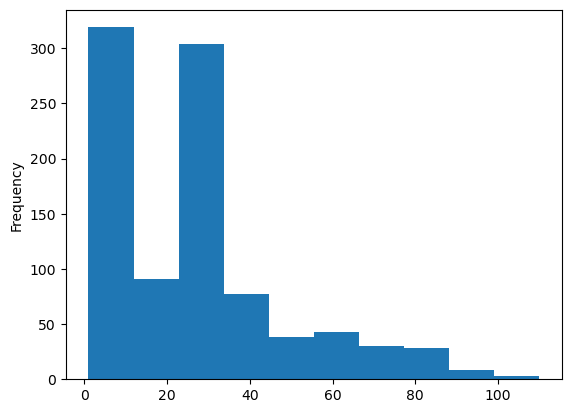

In [9]:
df_not_detected['not_dect_ages'].plot(kind = 'hist')

### Gender

<AxesSubplot:xlabel='not_dect_genders', ylabel='count'>

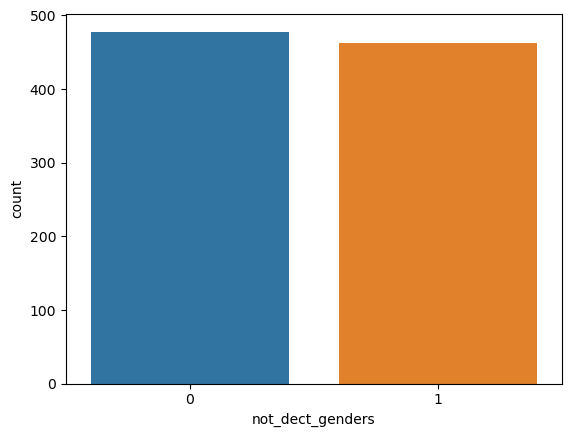

In [10]:
sns.countplot(df_not_detected['not_dect_genders'])

### Races

<AxesSubplot:xlabel='not_dect_races', ylabel='count'>

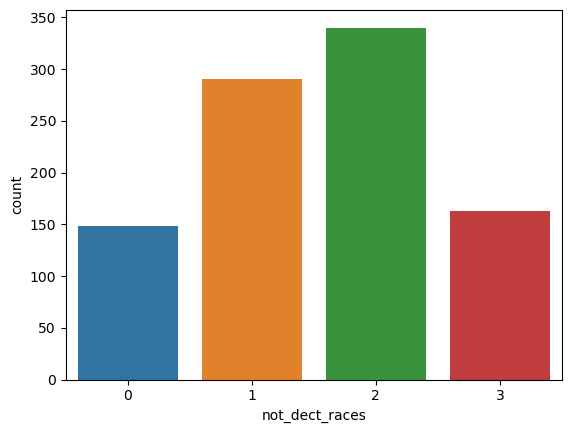

In [11]:
sns.countplot(df_not_detected['not_dect_races'])

### Caucasian

<AxesSubplot:xlabel='not_dect_caucasian', ylabel='count'>

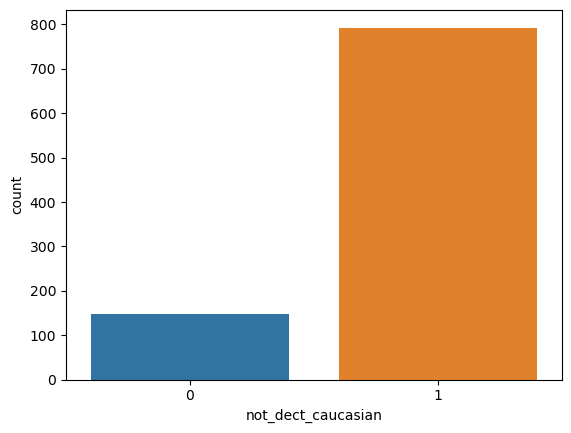

In [12]:
sns.countplot(df_not_detected['not_dect_caucasian'])

## Procent fordeling

### Køn

In [13]:
unique_gender, counts = np.unique(df['Genders'], return_counts=True)
counts_dict = dict(zip(unique_gender, counts))

percentage_g = [(len(df_not_detected[df_not_detected["not_dect_genders"] == i]) / counts_dict[i]) * 100 for i in unique_gender]

In [14]:
percentage_g

[9.165867689357622, 9.676071055381401]

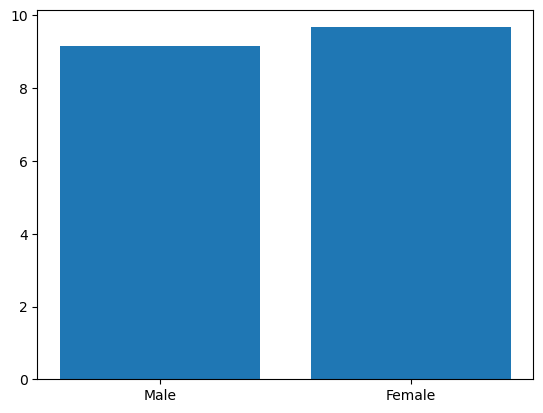

In [35]:
plt.bar(list(unique_gender), percentage_g)
plt.xticks(list(unique_gender), ['Male', 'Female'])
plt.show()

### Race

In [16]:
unique_race, counts = np.unique(df['Race'], return_counts=True)
counts_dict = dict(zip(unique_race, counts))

percentage_r = [(len(df_not_detected[df_not_detected["not_dect_races"] == i]) / counts_dict[i]) * 100 for i in unique_race]

In [17]:
percentage_r

[5.92, 11.600000000000001, 13.600000000000001, 6.52]

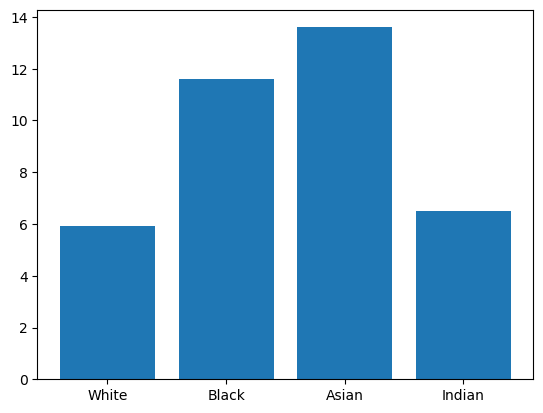

In [33]:
plt.bar(list(unique_race), percentage_r)
plt.xticks(list(unique_race),['White', 'Black', 'Asian', 'Indian'] )
plt.show()

### Caucasian

In [19]:
unique_caucasian, counts = np.unique(df['Caucasien/Non-caucasian'], return_counts=True)
counts_dict = dict(zip(unique_caucasian, counts))

percentage_c = [(len(df_not_detected[df_not_detected["not_dect_caucasian"] == i]) / counts_dict[i]) * 100 for i in unique_caucasian]



In [20]:
percentage_c

[5.92, 10.573333333333332]

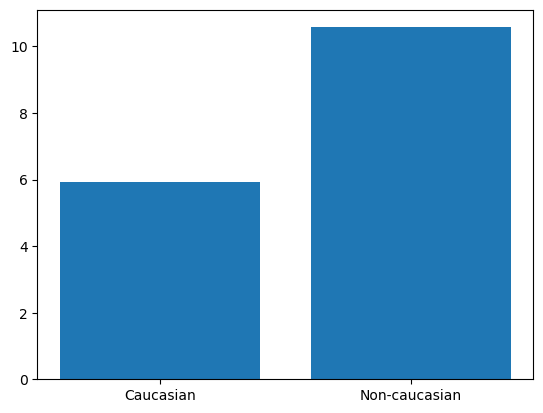

In [34]:
plt.bar(list(unique_caucasian), percentage_c)
plt.xticks(list(unique_caucasian), ['Caucasian', 'Non-caucasian'])
plt.show()

### Alder

In [22]:
unique_ages, counts = np.unique(df['Ages'], return_counts=True)
counts_dict = dict(zip(unique_ages, counts))

percentage_a = [(len(df_not_detected[df_not_detected["not_dect_ages"] == i]) / counts_dict[i]) * 100 for i in unique_ages]



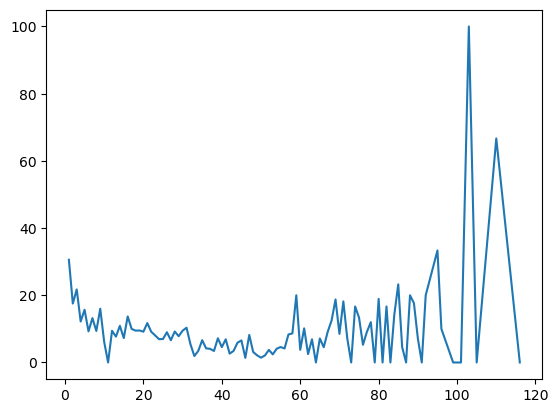

In [23]:
plt.plot(list(unique_ages), percentage_a)
plt.show()